<a href="https://colab.research.google.com/github/VimalKandrical/dl_sound_class/blob/Vimal/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification of Environmental Sound
**Autoren:**<br> Vimal Kandrical, Christian von Rotz

**Daten:**<br>[Urbansound8k](https://www.kaggle.com/chrisfilo/urbansound8k) 

# Einleitung

Im Rahmen des Moduls Deep Learning im CAS Machine Intelligence werden in diesem Projekt Tonaufnahmen von Umgebungsgeräuschen analysiert und mittels Deep Learning klassifiziert.  

##Beschreibung der Daten (kaggle.com)

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. The classes are drawn from the urban sound taxonomy. For a detailed description of the dataset and how it was compiled please refer to our paper.
All excerpts are taken from field recordings uploaded to www.freesound.org. The files are pre-sorted into ten folds (folders named fold1-fold10) to help in the reproduction of and comparison with the automatic classification results reported in the article above.

In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided.

**Audiofiles:**

8732 audio files of urban sounds (see description above) in WAV format. The sampling rate, bit depth, and number of channels are the same as those of the original file uploaded to Freesound (and hence may vary from file to file).

**Metadaten:**
*   slicefilename:<br>
    The name of the audio file. The name takes the following format:<br><br> [fsID]-4s[classID]-[occurrenceID]-[sliceID].wav<br><br>
    
    [fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken
   <br> [classID] = a numeric identifier of the sound class (see description of classID below for further details)
   <br> [occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording
   <br> [sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence
*   fsID:<br>
The Freesound ID of the recording from which this excerpt (slice) is taken
*   start:<br>
The start time of the slice in the original Freesound recording
*   end:<br>
The end time of slice in the original Freesound recording
*   salience:<br>
A (subjective) salience rating of the sound. 1 = foreground, 2 = background.
*   fold:<br>
The fold number (1-10) to which this file has been allocated.
*   classID:<br>
A numeric identifier of the sound class:
    0 = airconditioner 1 = carhorn
    2 = childrenplaying 3 = dogbark
    4 = drilling
    5 = engineidling 6 = gunshot
    7 = jackhammer
    8 = siren
    9 = street_music
*   class:<br>
 The class name: airconditioner, carhorn, childrenplaying, dogbark, drilling, engineidling, gunshot, jackhammer,
    siren, street_music.

**Bemerkungen:**<br>
Auf kaggle wird explizit darauf hingewiesen, dass man die Daten nicht noch einmal mischen soll, sondern die vordefinierten 10 folds benützen soll. Nur so kann das erzielte Resultat mit anderen Resultaten verglichen. Zudem soll 10-fold cross validation angewendet werden, da die einzelnen folds nicht gleich schwer sind. Das Endresultat ist die durchschnittliche accuracy. 

**Acknowledgements:**<br>
Die hier präsentierte Lösung basiert teilweise auf der Lösung von [Mike Smales](https://github.com/mikesmales/Udacity-ML-Capstone/blob/master/Report/Report.pdf). 

Zudem zitieren wir gerne folgendes Paper: <br>
J. Salamon, C. Jacoby and J. P. Bello, "A Dataset and Taxonomy for Urban Sound Research", 22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.

# Daten laden

*Dieser Teil muss nur einmal ausgeführt werden, damit die Daten in Colab sind.*

Google Colab benötigt Zugriff auf Kaggle via API. Der API Token muss unter content abliegen.

In [2]:
from google.colab import drive
import os
os.chdir("/content")
os.listdir()

['.config', 'sample_data']

Zugriffsrechte anpassen und File downloaden

In [8]:
!mkdir -p ~/.kaggle
!cp "/content/kaggle.json" ~/.kaggle/
!chmod 600 "/content/kaggle.json"
!kaggle datasets download -d chrisfilo/urbansound8k

100% 5.60G/5.61G [02:04<00:00, 57.1MB/s]
100% 5.61G/5.61G [02:04<00:00, 48.5MB/s]


Zipfile entpacken

In [9]:
os.chdir("/content")
!unzip urbansound8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: fold4/154758-5-0-0.wav  
  inflating: fold4/154758-5-0-1.wav  
  inflating: fold4/154758-5-0-10.wav  
  inflating: fold4/154758-5-0-11.wav  
  inflating: fold4/154758-5-0-12.wav  
  inflating: fold4/154758-5-0-13.wav  
  inflating: fold4/154758-5-0-14.wav  
  inflating: fold4/154758-5-0-15.wav  
  inflating: fold4/154758-5-0-16.wav  
  inflating: fold4/154758-5-0-17.wav  
  inflating: fold4/154758-5-0-18.wav  
  inflating: fold4/154758-5-0-19.wav  
  inflating: fold4/154758-5-0-2.wav  
  inflating: fold4/154758-5-0-20.wav  
  inflating: fold4/154758-5-0-21.wav  
  inflating: fold4/154758-5-0-3.wav  
  inflating: fold4/154758-5-0-4.wav  
  inflating: fold4/154758-5-0-5.wav  
  inflating: fold4/154758-5-0-6.wav  
  inflating: fold4/154758-5-0-7.wav  
  inflating: fold4/154758-5-0-8.wav  
  inflating: fold4/154758-5-0-9.wav  
  inflating: fold4/155320-3-0-0.wav  
  inflating: fold4/156362-4-0-0.wav  
  inflating: fold4/156362

# Voranalyse

Bevor die Audiofiles genutzt werden können, muss ihr Aufbau verstanden werden. Diese Informationen stehen ganz am Anfang des WAV Files im sogenannten Header (44 Bytes lang). Folgende Informationen sind relevant:

Information  | Position
  ------------- | -------------
  Anzahl Channels (mono/stereo)  | 23-24
  Sample rate  | 25-28
Bits pro Sample | 35-36

(Details zum Aufbau eines WAV (RIFF) Files können [hier](http://www.topherlee.com/software/pcm-tut-wavformat.html) nachgelesen werden.)

Hier ein Beispiel:

In [10]:
import struct
import os


def readheader(filename):
  with open(filename, "rb") as wavfile:
    header = wavfile.read(44)
    channels = struct.unpack("<H", header[22:24])[0]
    samplerate = struct.unpack("<I", header[24:28])[0]
    bitsprosample = struct.unpack("<H", header[34:36])[0]
  return (filename, channels, samplerate, bitsprosample)

beispiel = readheader("/content/fold5/100032-3-0-0.wav")
print("Anzahl Channels: ", beispiel[1])
print("Sample rate: ", beispiel[2])
print("Bits pro Sample: ", beispiel[3])

Anzahl Channels:  2
Sample rate:  44100
Bits pro Sample:  16


Analog werden nun alle Audiofiles gelesen und die Charakteristik in einem Dataframe festgehalten.

In [11]:
import pandas as pd

pd.options.display.max_columns = 10
pd.options.display.max_rows = 1000

metadaten = pd.read_csv("/content/UrbanSound8K.csv")
#print(metadaten.head()) 
#print(metadaten.dtypes) -> passt soweit

informationen = []

for i, r in metadaten.iterrows():
  audiofile = os.path.join(os.path.abspath("/content/"),"fold"+str(r["fold"])
  +"/",str(r["slice_file_name"]))
  informationen.append(readheader(audiofile))

aufbau = pd.DataFrame(informationen, columns=['filename', 'anz_channels', 
                                              'samplerate', 'bits_pro_sample'])
print(aufbau["anz_channels"].value_counts())
print(aufbau["samplerate"].value_counts())
print(aufbau["bits_pro_sample"].value_counts())

display(aufbau[aufbau["bits_pro_sample"] == 16])


2    7993
1     739
Name: anz_channels, dtype: int64
44100     5370
48000     2502
96000      610
24000       82
16000       45
22050       44
11025       39
192000      17
8000        12
11024        7
32000        4
Name: samplerate, dtype: int64
16    5758
24    2753
32     169
8       43
4        9
Name: bits_pro_sample, dtype: int64


,filename,anz_channels,samplerate,bits_pro_sample
0,/content/fold5/100032-3-0-0.wav,2,44100,16
1,/content/fold5/100263-2-0-117.wav,2,44100,16
2,/content/fold5/100263-2-0-121.wav,2,44100,16
3,/content/fold5/100263-2-0-126.wav,2,44100,16
4,/content/fold5/100263-2-0-137.wav,2,44100,16
...,...,...,...,...
8727,/content/fold7/99812-1-2-0.wav,2,44100,16
8728,/content/fold7/99812-1-3-0.wav,2,44100,16
8729,/content/fold7/99812-1-4-0.wav,2,44100,16
8730,/content/fold7/99812-1-5-0.wav,2,44100,16


Es lässt sich festhalten, dass die Audiofiles bzgl. Anzahl Channels (Mono/Stereo), Samplerate und Bits pro Sample variieren.

In einem nächsten Schritt analysieren wir die Verteilung der einzelnen Klassen:

In [12]:
# Anpassung des Header des Dataframes, da class ein reservierter Begriff ist
metadaten = metadaten.rename({'class': 'class_name'}, axis = 'columns')

print('Klassenzugehörigkeit', '\n')
print(metadaten.class_name.value_counts())

Klassenzugehörigkeit 

children_playing    1000
drilling            1000
street_music        1000
dog_bark            1000
air_conditioner     1000
engine_idling       1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class_name, dtype: int64


Wir sehen, dass alle Klassen gleich oft vertreteten sind, ausser die Sirene und insbesondere die Autohupe und der Pistolenschuss, welche deutlich untervertreten sind.

Nun betrachten wir jeweils ein Beispiel der Wellenform von jeder Klasse und lassen es uns vorspielen.

176400
176400
176400
14004
176400
192000
38367
64800
176400
176400

Klasse: dog_bark


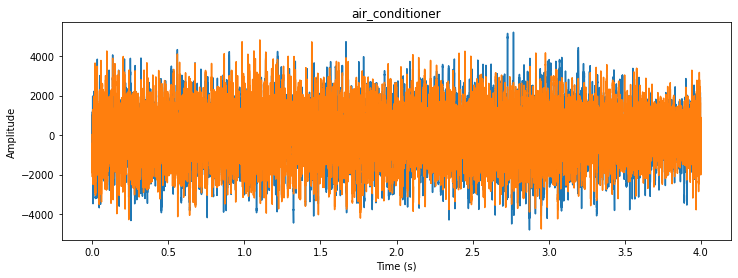

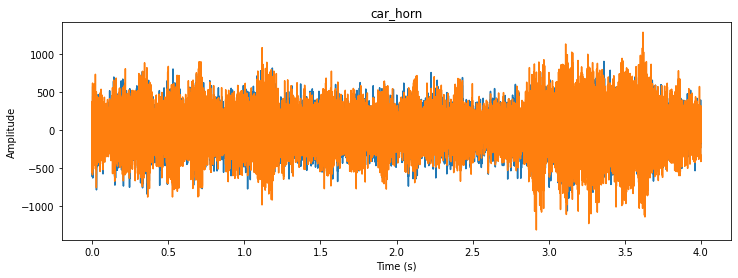

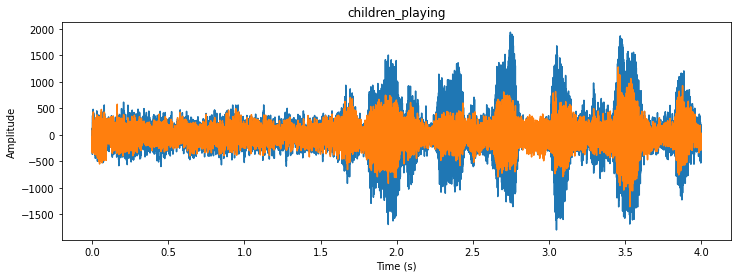

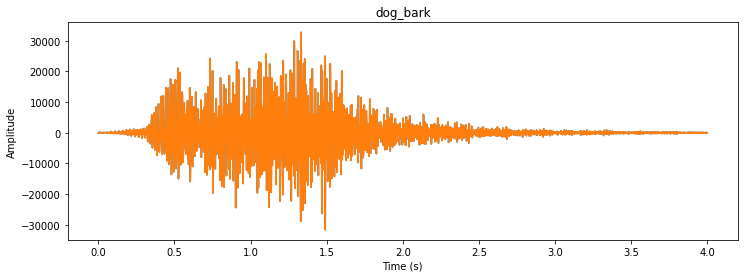

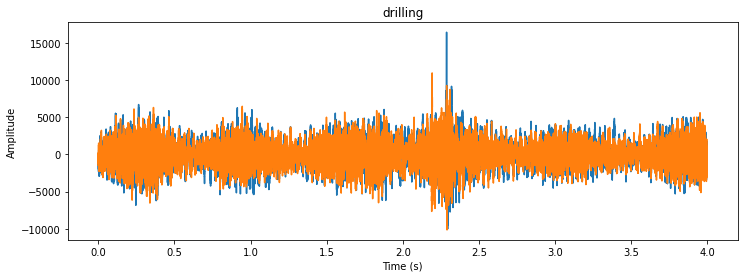

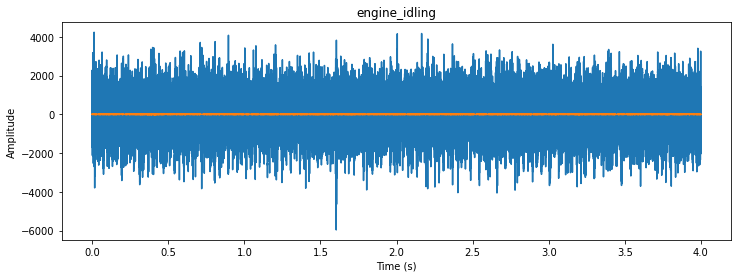

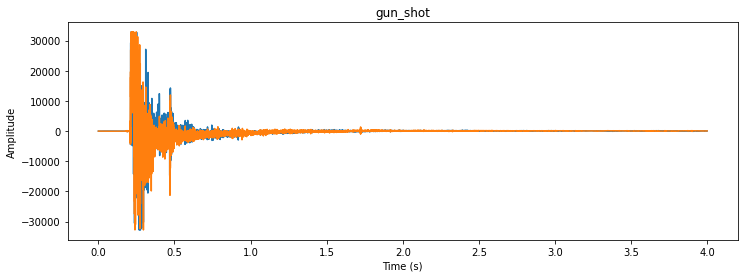

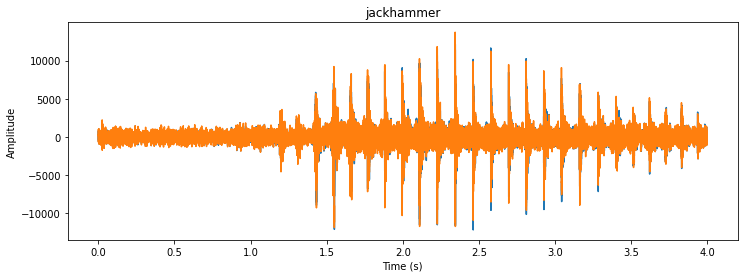

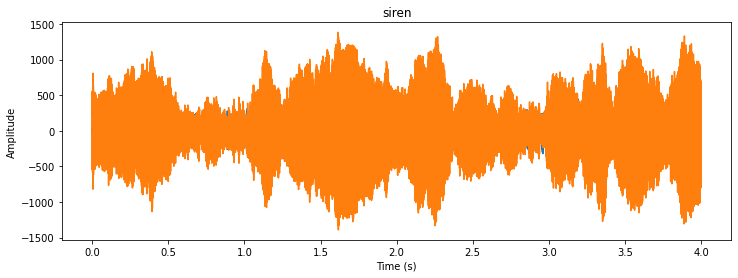

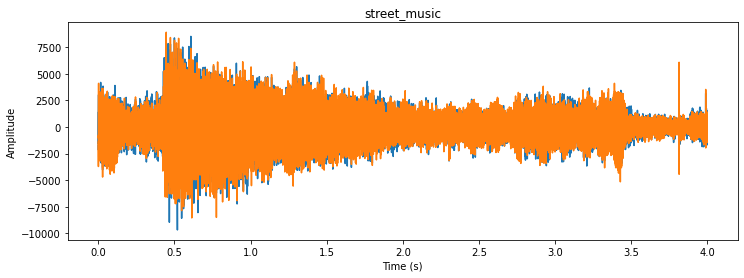

In [13]:
import numpy as np
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

# Filepath und Klassenzugehoerigkeit
def path_class(filename):
    excerpt = metadaten[metadaten['slice_file_name'] == filename]
    path_name = os.path.join('/content/', 'fold'+str(excerpt.fold.values[0]), 
                             filename)
    return path_name, excerpt['class_name'].values[0]

# WAV File plotten
def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    print(np.size(wav_sample,0))
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    font = {"color": "white"}
    plt.figure(figsize=(12, 4))
    plt.title(class_label)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0,4,np.size(wav_sample,0)),wav_sample) 

# Jeweils ein Beispiel pro Klasse
beispiele = ["55018-0-0-246.wav", "99812-1-2-0.wav", "100263-2-0-126.wav", 
             "100032-3-0-0.wav", "17913-4-0-2.wav", "154758-5-0-21.wav",
             "76093-6-0-0.wav", "171305-7-10-0.wav", "74726-8-0-7.wav",
             "41364-9-0-22.wav"]

for b in beispiele:
  fullpath, label = path_class(b)
  wav_plotter(fullpath,label)

# Einzelnes Audiofile abspielen
abspielen = "100032-3-0-0.wav"
print("\nKlasse:", path_class(abspielen)[1])
ipd.Audio(path_class(abspielen)[0])

# Datentransformation

Wir haben festgestellt, dass die Audiofiles unterschiedliche Formate haben und daher alle auf das gleiche Format bzgl. Kanäle, Samplerate und Bits pro Sample vereinheitlicht werden müssen. Dazu verwenden wir die load() Funktion der [LibROSA Bibliothek](https://librosa.github.io/librosa/).
<ul>
<li>Anzahl Kanäle: <br>Reduktion auf 1 Kanal</li>
<li>Samplerate: <br>Konvertierung auf 22.050 KHz</li>
<li>Bits pro sample: <br> Normalisierung auf -1 bis 1</li>
</ul>

Anhand eines Beispiel zeigen wir diese Anpassungen auf (als Vergleich der Originaldaten und den Daten mit Librosa eingelesen).

Anzeige der Kanäle 



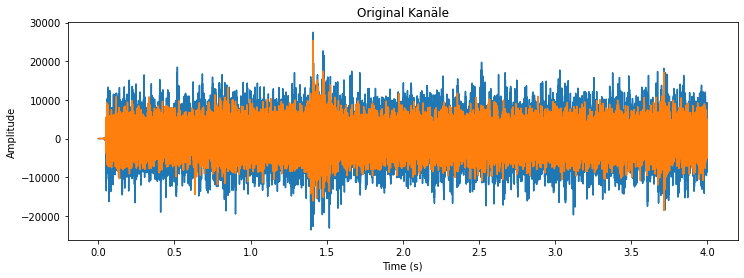

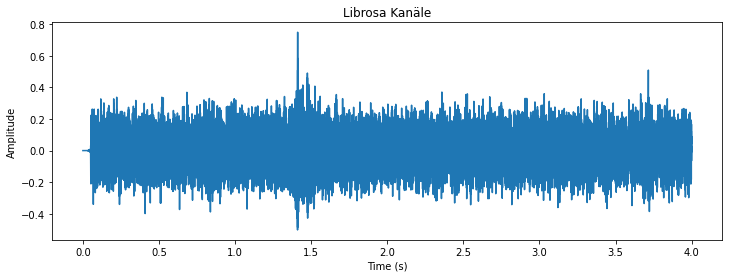


Samplerate
Original Hz:  44100
Librosa Hz:  22050

Anzeige der Amplitude
Original Audiofile:  -23628 bis 27507
Librosa Audiofile:  -0.50266445 bis 0.74983937


In [14]:
import librosa
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

# ein Beispielfilename
beispiel_dateiname = '/content/fold5/100852-0-0-0.wav'
librosa_audio, librosa_sample_rate = librosa.load(beispiel_dateiname)
scipy_sample_rate, scipy_audio = wav.read(beispiel_dateiname)

# Anzahl Kanäle
font = {"color": "white"}
print('Anzeige der Kanäle', '\n')
plt.figure(figsize = (12, 4))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Kanäle')
plt.plot(np.linspace(0,4,np.size(scipy_audio,0)), scipy_audio)

plt.figure(figsize = (12, 4))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Librosa Kanäle')
plt.plot(np.linspace(0,4,np.size(librosa_audio,0)), librosa_audio)
plt.show()

# Sample rate
print('\nSamplerate')
print('Original Hz: ', scipy_sample_rate)
print('Librosa Hz: ', librosa_sample_rate)

# Bits pro sample
print('\nAnzeige der Amplitude')
print('Original Audiofile: ', np.min(scipy_audio), 'bis', np.max(scipy_audio))
print('Librosa Audiofile: ', np.min(librosa_audio), 'bis', np.max(librosa_audio))

# Feature Extraktion

Wir extrahieren die <b>Mel-Frequency Cepstral Coefficients (MFCC)</b> der jeweiligen Audiofiles. Dank diesem Feature können wir sowohl die Frequenz als auch die zeitliche Charakteristik eines Audiofiles erkennen.

In [15]:
mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 173)


Für ein einzelnes Audiofile werden also 40 MFCCs über 173 Frames erstellt!

Wir extrahieren nun für alle Audiofiles jeweils 40 MFCCs. Da die Audiofiles nicht immer gleich lang sind, sind die MFCCs teilweise unterschiedlich lang. Die leeren Stellen werden mit Nullen aufgefüllt.

In [16]:
def extract_features(file_name):

  try:
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    pad_width = 174 - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')

  except Exception as e:
    print('Error encountered while parsing audiofile: ', file_name)
    return None
    
  return mfccs


features = []

for each_index, each_row in metadaten.iterrows():
  audiofile = os.path.join(os.path.abspath('/content/'), 'fold' + 
                           str(each_row['fold']) + '/', 
                           str(each_row['slice_file_name']))

  klasse = each_row['class_name']
  fold = each_row['fold']
  daten = extract_features(audiofile)

  features.append([daten, fold, klasse])

featuresdf = pd.DataFrame(features, columns = ['feature', 'fold', 'klasse'])
print('Features aus ', len(featuresdf), ' Dateien extrahiert')

Features aus  8732  Dateien extrahiert


# CNN - simpel

In [0]:
%tensorflow_version 2.x
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.klasse.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, 
                                                    random_state=42)
num_labels = yy.shape[1]
filter_size = 2

In [50]:
# CNN Modell
zeilen = 40
spalten = 174

x_train = x_train.reshape(x_train.shape[0], zeilen, spalten, 1)
x_test = x_test.reshape(x_test.shape[0], zeilen, spalten, 1)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(zeilen, spalten, 1), 
                 activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], 
              optimizer='adam')

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 8, 41, 64)       

Epoch 1/144
14/14 [==============================] - 1s 69ms/step - loss: 6.7214 - accuracy: 0.1427 - val_loss: 2.3185 - val_accuracy: 0.1546
Epoch 2/144
14/14 [==============================] - 1s 56ms/step - loss: 2.5298 - accuracy: 0.1825 - val_loss: 2.1345 - val_accuracy: 0.2044
Epoch 3/144
14/14 [==============================] - 1s 57ms/step - loss: 2.0967 - accuracy: 0.2554 - val_loss: 2.0524 - val_accuracy: 0.2725
Epoch 4/144
14/14 [==============================] - 1s 58ms/step - loss: 1.9300 - accuracy: 0.2968 - val_loss: 1.9834 - val_accuracy: 0.3114
Epoch 5/144
14/14 [==============================] - 1s 57ms/step - loss: 1.7916 - accuracy: 0.3549 - val_loss: 1.8587 - val_accuracy: 0.4030
Epoch 6/144
14/14 [==============================] - 1s 57ms/step - loss: 1.6720 - accuracy: 0.3994 - val_loss: 1.7370 - val_accuracy: 0.4333
Epoch 7/144
14/14 [==============================] - 1s 57ms/step - loss: 1.5641 - accuracy: 0.4405 - val_loss: 1.6541 - val_accuracy: 0.4637
Epoch 

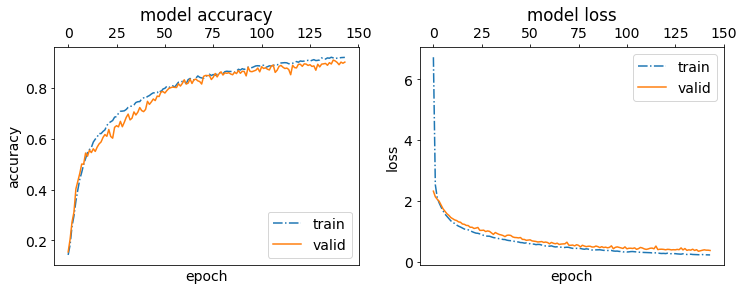

In [51]:
num_epochs = 144
num_batch_size = 512

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test))

score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])



# Anzeige der Entwicklung der Genauigkeit und Loss-function
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, (1))
plt.plot(history.history['accuracy'], linestyle = '-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'lower right')
plt.subplot(1, 2, (2))
plt.plot(history.history['loss'], linestyle = '-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper right')
plt.show()



In [0]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
klassennamen = ["airconditioner", "carhorn", "childrenplaying", "dogbark", "drilling", "engineidling", "gunshot", "jackhammer", "siren", "street_music"]

Confusion Matrix
[[188   0   4   0   0   5   0   1   1   4]
 [  0  81   1   1   0   1   0   1   1   0]
 [  4   0 140   3   3   8   0   0   9  16]
 [  1   2   6 178   2   0   2   1   5   4]
 [  4   4   1   0 190   2   0   4   0   1]
 [  1   2   0   0   1 182   0   4   1   2]
 [  0   0   0   3   1   0  68   0   0   0]
 [  0   0   0   0   3   1   0 204   0   0]
 [  0   0   0   2   0   0   0   1 162   0]
 [  6   5  16   1   1   3   0   3  11 184]]


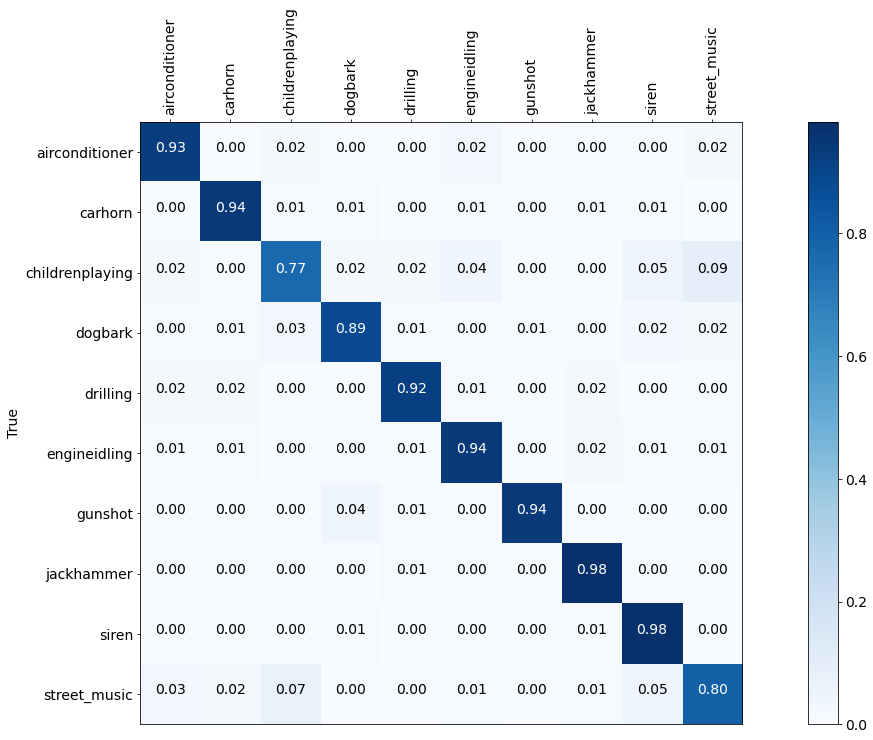

In [53]:
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)
font = {"size":14}

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax = plt.gca()
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.rcParams.update({'font.size': 14})
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.labeltop'] = True
plt.xticks(rotation=90)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(klassennamen))
plt.xticks(tick_marks, klassennamen)
plt.yticks(tick_marks, klassennamen)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True', fontdict=font)
plt.tight_layout()

# CNN mit Cross-Validation

Nun wird ein CNN als Modell genutzt. Zudem wird wie in der Einleitung beschrieben eine Cross-Validation mit den 10 vordefinierten Fold durchgeführt.

Das CNN Modell:

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

zeilen = 40
spalten = 174
klassen_anz = 10
filter_size = 2

def create_model():
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=2, input_shape=(zeilen, spalten, 1), 
                  activation="relu"))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())

  model.add(Dense(klassen_anz, activation='softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], 
                optimizer='adam')
  return model

Training und Evaluation:

In [27]:
%tensorflow_version 2.x
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

zeilen = 40
spalten = 174

num_epochs = 144
num_batch_size = 512

le = LabelEncoder()
accuracies = []

for f in range(1,11):
  X_train = np.array(featuresdf[featuresdf["fold"] != f].feature.tolist())
  X_test = np.array(featuresdf[featuresdf["fold"] == f].feature.tolist())
  y_train = np.array(featuresdf[featuresdf["fold"] != f].klasse.tolist())
  y_test = np.array(featuresdf[featuresdf["fold"] == f].klasse.tolist())

  yy_train = to_categorical(le.fit_transform(y_train))
  yy_test = to_categorical(le.fit_transform(y_test))

  X_train = X_train.reshape(X_train.shape[0], zeilen, spalten, 1)
  X_test = X_test.reshape(X_test.shape[0], zeilen, spalten, 1)

  model = create_model()
  model.fit(X_train, yy_train, batch_size=num_batch_size, epochs=num_epochs, 
            verbose=0, validation_data=(X_test, yy_test))

  print("Run ", f)
  score = model.evaluate(X_train, yy_train, verbose=0)
  print("Training Accuracy: ", score[1])
  score = model.evaluate(X_test, yy_test, verbose=0)
  print("Testing Accuracy: ", score[1],"\n")
  accuracies.append(score[1])

print("Average Accuracy", np.mean(accuracies))

Run  1
Training Accuracy:  0.9643720388412476
Testing Accuracy:  0.5807560086250305 

Run  2
Training Accuracy:  0.9742478132247925
Testing Accuracy:  0.5247747898101807 

Run  3
Training Accuracy:  0.9678493738174438
Testing Accuracy:  0.5600000023841858 

Run  4
Training Accuracy:  0.9554378986358643
Testing Accuracy:  0.5525252819061279 

Run  5
Training Accuracy:  0.9647254943847656
Testing Accuracy:  0.6474359035491943 

Run  6
Training Accuracy:  0.9710456728935242
Testing Accuracy:  0.5492101907730103 

Run  7
Training Accuracy:  0.977831244468689
Testing Accuracy:  0.5763723254203796 

Run  8
Training Accuracy:  0.9632853865623474
Testing Accuracy:  0.5607940554618835 

Run  9
Training Accuracy:  0.9550278186798096
Testing Accuracy:  0.6666666865348816 

Run  10
Training Accuracy:  0.9597213268280029
Testing Accuracy:  0.6248506307601929 

Average Accuracy 0.5843385875225067
